In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from upsetplot import UpSet

In [43]:
df0 = pd.read_csv('c0_label_positions_AD_ICD10_volcano.csv')
df1 = pd.read_csv('c1_label_positions_AD_ICD10_volcano.csv')
df2 = pd.read_csv('c2_label_positions_AD_ICD10_volcano.csv')
df3 = pd.read_csv('c3_label_positions_AD_ICD10_volcano.csv')
df4 = pd.read_csv('c4_label_positions_AD_ICD10_volcano.csv')

In [44]:
df0

,Label,X,Y,flag,mapping
0,I10,-3.501890,311.141798,0,Essential (primary) hypertension
1,F02.80,-0.580468,17.283751,1,Dementia in other diseases classified elsewhere
2,F03.90,-2.259136,241.876775,0,Unspecified dementia
3,R41.3,-1.255849,67.037987,0,NaN
4,E78.5,-2.636000,300.520953,0,Disorders of lipoprotein metabolism and other ...
...,...,...,...,...,...
1733,B02.22,-11.000000,5.426771,0,NaN
1734,S50.10XA,-11.000000,5.426771,0,NaN
1735,D68.4,-11.000000,5.426771,0,NaN
1736,B95.1,-11.000000,5.426771,0,NaN


In [45]:
df0['Cluster']=0
df1['Cluster']=1
df2['Cluster']=2
df3['Cluster']=3
df4['Cluster']=4


In [46]:
data = pd.concat([df0, df1, df2, df3, df4], axis=0)

In [47]:
data = data[data['X']<0]

In [48]:
data.sort_values('X')

,Label,X,Y,flag,mapping,Cluster
254,M25.78,-11.000000,5.557136,0.0,NaN,4
1685,M25.761,-11.000000,7.936226,0.0,NaN,0
1686,S01.20XA,-11.000000,7.517773,0.0,NaN,0
1687,K12.1,-11.000000,7.517773,0.0,NaN,0
1688,G62.2,-11.000000,7.517773,0.0,NaN,0
...,...,...,...,...,...,...
21,G20,-0.788168,11.804512,1.0,Parkinson's disease,0
69,R41.89,-0.727973,7.591979,0.0,NaN,4
6,G31.84,-0.679802,15.297208,1.0,Mild cognitive impairment,0
43,R47.01,-0.677263,5.589816,0.0,NaN,0


In [49]:
data = data[~(data['X'] == -11)]

In [50]:
data[data['Label']=='M85.851']['X']

Series([], Name: X, dtype: float64)

In [51]:
data.sort_values('X')

,Label,X,Y,flag,mapping,Cluster
1624,H60.399,-7.153941,34.429275,0.0,NaN,0
1612,I50.1,-7.046829,31.916566,0.0,Heart failure,0
1529,H91.8X9,-6.735190,50.118828,0.0,"Hearing loss, unspecified",0
1305,Z13.31,-6.633816,90.447532,0.0,NaN,0
1581,W18.09XA,-6.467823,21.097172,0.0,NaN,0
...,...,...,...,...,...,...
21,G20,-0.788168,11.804512,1.0,Parkinson's disease,0
69,R41.89,-0.727973,7.591979,0.0,NaN,4
6,G31.84,-0.679802,15.297208,1.0,Mild cognitive impairment,0
43,R47.01,-0.677263,5.589816,0.0,NaN,0


In [52]:
data = data[['Label','Cluster','mapping']]

In [53]:
data

,Label,Cluster,mapping
0,I10,0,Essential (primary) hypertension
1,F02.80,0,Dementia in other diseases classified elsewhere
2,F03.90,0,Unspecified dementia
3,R41.3,0,NaN
4,E78.5,0,Disorders of lipoprotein metabolism and other ...
...,...,...,...
242,I67.82,4,NaN
243,M17.12,4,NaN
244,J98.11,4,NaN
245,R00.8,4,NaN


In [54]:
#data = data[data['Label'].str.len() < 4]

In [55]:
# クラスターごとのバイナリ行列を作成
data['value'] = 1
pivot_df = data.pivot_table(index='Cluster', columns='Label', values='value', fill_value=0)

In [56]:
pivot_df.index = ["Cluster " + str(i)  for i in pivot_df.index]

In [57]:
pivot_df

Label,A04.72,A04.8,A08.8,A09,A15.0,A15.9,A31.0,A41.50,A41.51,A41.59,...,Z98.1,Z98.41,Z98.42,Z98.49,Z98.61,Z98.89,Z98.890,Z99.11,Z99.3,Z99.81
Cluster 0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Cluster 3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Cluster 4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [58]:
from upsetplot import UpSet, from_contents

In [59]:
# Enrichment criteria: adjusted p-value < 0.05

<Figure size 1000x600 with 0 Axes>

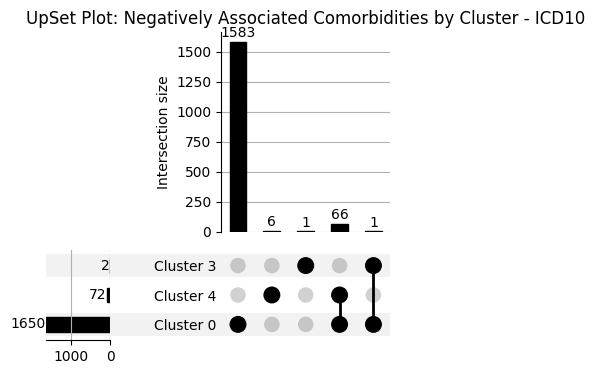

In [60]:
# クラスターごとのTrue/Falseのマッピングを生成
contents = {}
for label, row in pivot_df.iterrows():
    clusters = row[row == 1].index.tolist()  # クラスター番号のリストを取得
    contents[label] = clusters

# UpSetプロットのデータを生成
upset_data = from_contents(contents)

plt.figure(figsize=(10, 6))  # 画像のサイズを小さく設定

# UpSetプロットを描画
upset = UpSet(upset_data, subset_size='count', show_counts=True)
upset.plot()
plt.title('UpSet Plot: Negatively Associated Comorbidities by Cluster - ICD10')
plt.show()

In [61]:
# upset_dataからPandas DataFrameを作成する
upset_df = upset_data.reset_index()

# カラムの名前を適切に変更（例: 'index' と 'value'）
upset_df.columns = ['c0','c3','c4', 'ICD']

In [62]:
upset_df.to_csv('upset_df_AD_diagnosis_ICDfull_negative_revised.csv')